# 120 years of Olympic history: athletes and results

## Part 1 - Data Ingestion 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("athlete_events.csv")

Quick overview of the dataset

In [3]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
df.shape

(271116, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


We have some information about the columns and their type. 
Also there is something that we can observe - **the data contains NaN values** on columns Age, Height, Weight, Medal

So, let's see how many missing values exactly are:

In [7]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## Part 2 - Data Exploratory 

We are going to store a copy of the dataframe for this part.

In [8]:
import copy
data = df.copy()

In [9]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


We are going to replace the NaN values on the column Medal

In [10]:
data.Medal = data.Medal.fillna('No Medal')

In [11]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Text column

Find out which are the most common names

In [12]:
#!pip install wordcloud  - daca e prima oara cand rulezi atunci decomenteaza si instaleaza
from wordcloud import WordCloud

In [13]:
athletes=data.iloc[:,1]#getting column that include names and surnames of athletes
list_athletes=list(athletes.unique())
list_athletes=[x.split() for x in list_athletes]
text=""
for i in list_athletes:
    text+= " ".join(i)+" "

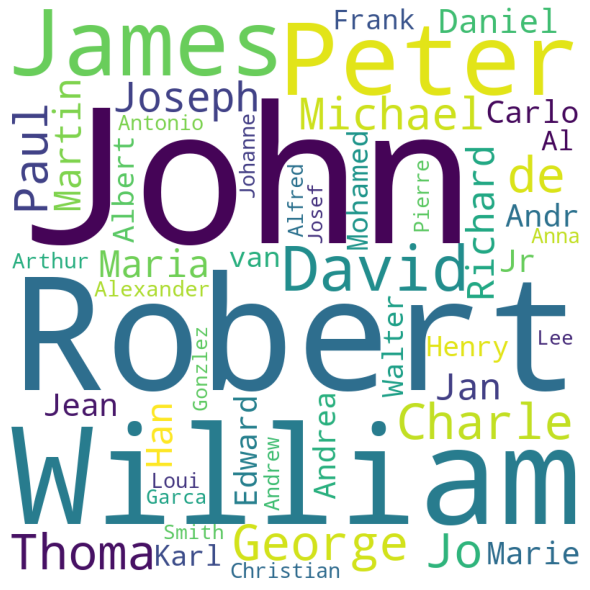

In [14]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10,max_words=50).generate(text) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Sex column

D:\Daniel\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


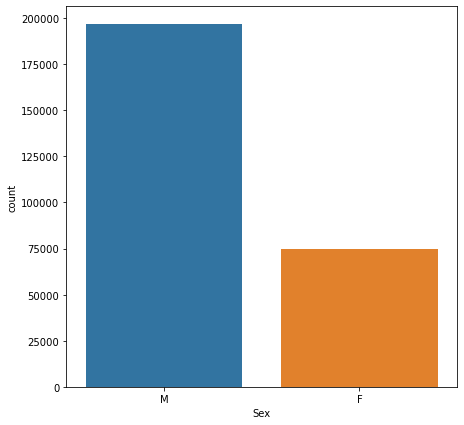

In [15]:
plt.figure(figsize=(7, 7))
g = sns.countplot(data['Sex'])

From this plot we can see that the number of Male participants are almost 3 times bigger than the females.

But in the original dataframe we can see that we have some duplicates in names.

In [16]:
print("Number of athlets: ", data["ID"].nunique())
print("Male athlets: ", data.loc[data["Sex"] == "M"]["ID"].nunique())
print("Female athlets: ", data.loc[data["Sex"] == "F"]["ID"].nunique())

Number of athlets:  135571
Male athlets:  101590
Female athlets:  33981


In [17]:
print("Actual Ratio of Male / Female is ",  data.loc[data["Sex"] == "M"]["ID"].nunique() /data.loc[data["Sex"] == "F"]["ID"].nunique() )

Actual Ratio of Male / Female is  2.9896118419116564


### Age column

The best way to plot this distribution is to make a **boxplot**.

D:\Daniel\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


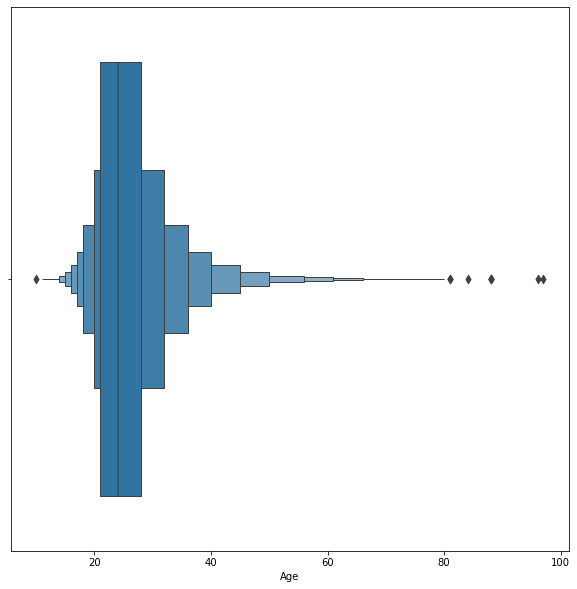

In [18]:
plt.figure(figsize=(10,10))
sns.boxenplot(data['Age'])
plt.show()

We can see from this plot that the median quartile is around 20-30 years. But also there are some outliers in the data that could also been observed in the describe() function.

In [19]:
data[data.Age > 80].sort_values(by = 'Age', ascending = False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
60861,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
60862,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
60863,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
9371,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
154855,77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",No Medal
236912,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,No Medal


### Age distribution for gender

D:\Daniel\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Daniel\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


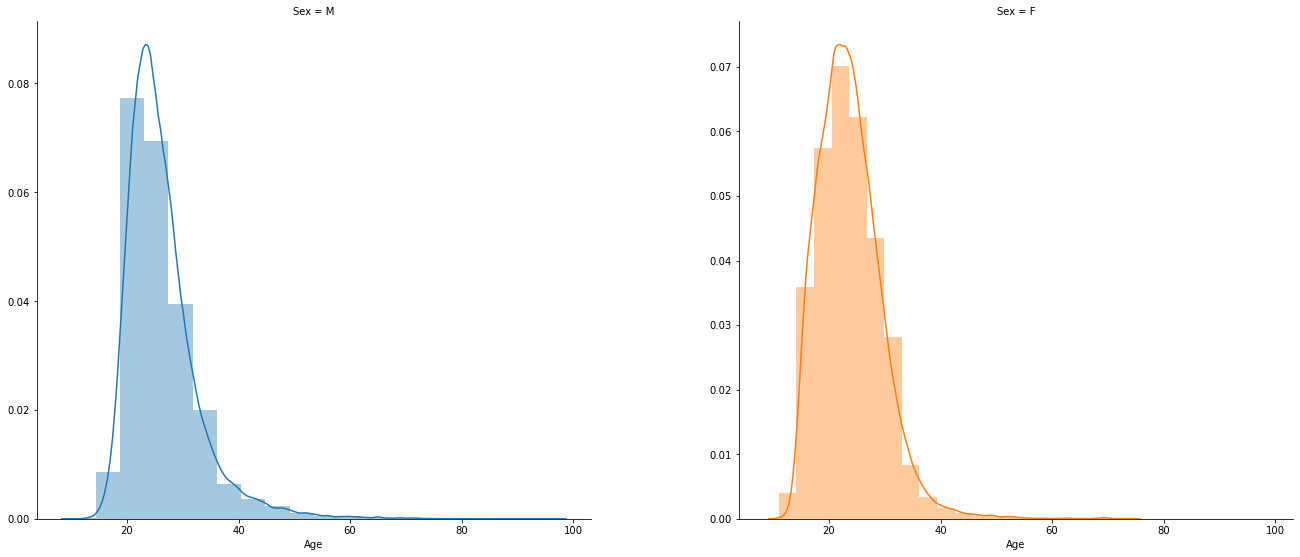

In [20]:
age_distr = sns.FacetGrid(df, col="Sex", hue='Sex', sharey=False)
age_distr.map(sns.distplot, "Age", bins=20, kde=True)
age_distr.fig.set_size_inches(20, 10)

### Height column

D:\Daniel\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


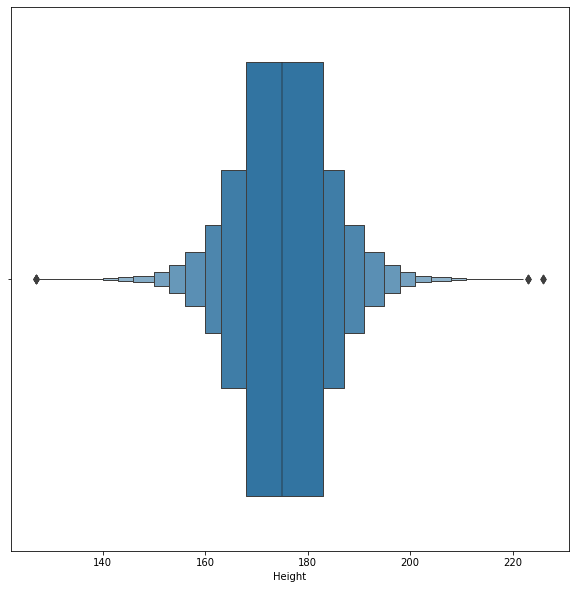

In [21]:
plt.figure(figsize=(10,10))
sns.boxenplot(data['Height'])
plt.show()

In [22]:
data[data.Height > 220].sort_values(by = 'Height', ascending = False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,No Medal
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,No Medal
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,No Medal
32376,16639,Tommy Loren Burleson,M,20.0,223.0,102.0,United States,USA,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver
207373,104059,Arvydas Romas Sabonis,M,23.0,223.0,122.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
207374,104059,Arvydas Romas Sabonis,M,27.0,223.0,122.0,Lithuania,LTU,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Bronze
207375,104059,Arvydas Romas Sabonis,M,31.0,223.0,122.0,Lithuania,LTU,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze
17669,9407,Gunther Behnke,M,29.0,221.0,114.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
59371,30409,Roberto Dueas Hernndez,M,24.0,221.0,137.0,Spain,ESP,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,No Medal
59372,30409,Roberto Dueas Hernndez,M,28.0,221.0,137.0,Spain,ESP,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,No Medal


As expected those players are basketballers

In [23]:
data[data.Height > 220].sort_values(by = 'Height', ascending = False).Sport.value_counts()

Basketball    11
Name: Sport, dtype: int64

In [24]:
data[data.Height < 130].sort_values(by = 'Height', ascending = False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
180615,90772,Helman Palije,M,21.0,128.0,74.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Middleweight,No Medal
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,No Medal
29334,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,No Medal
29335,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,No Medal
29336,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,No Medal
29337,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,No Medal
29338,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Balance Beam,No Medal
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,No Medal


In the lower limit of height

<AxesSubplot:>

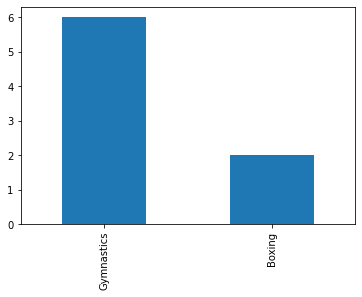

In [25]:
data[data.Height < 130].sort_values(by = 'Height', ascending = False).Sport.value_counts().plot(kind = "bar")

D:\Daniel\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Daniel\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


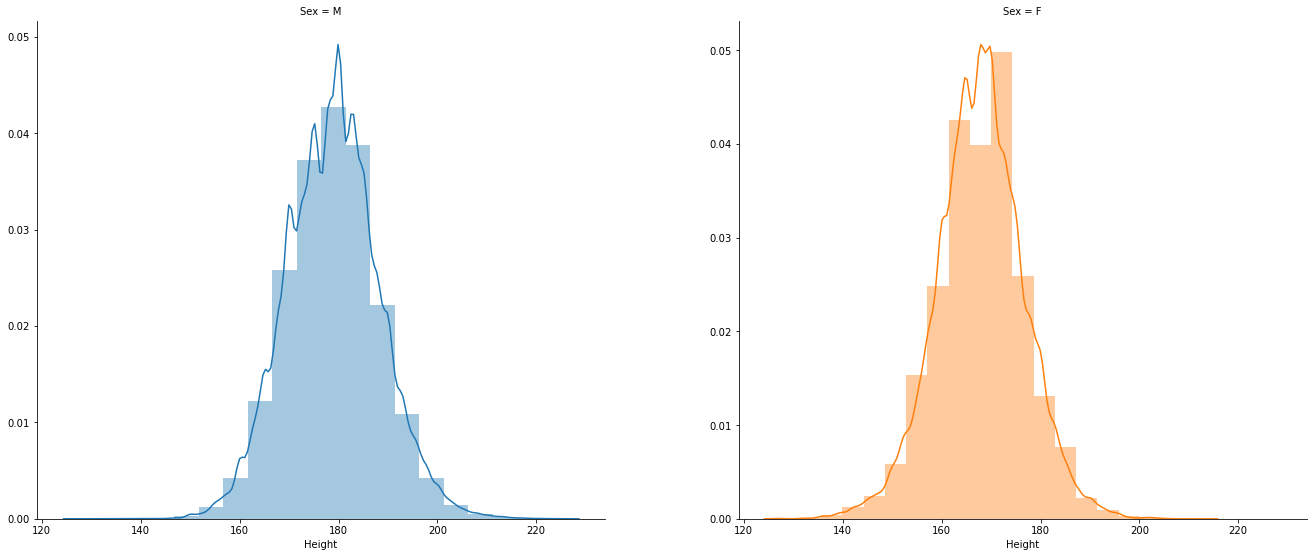

In [26]:
age_distr = sns.FacetGrid(df, col="Sex", hue='Sex', sharey=False)
age_distr.map(sns.distplot, "Height", bins=20, kde=True)
age_distr.fig.set_size_inches(20, 10)

### Weight column

D:\Daniel\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


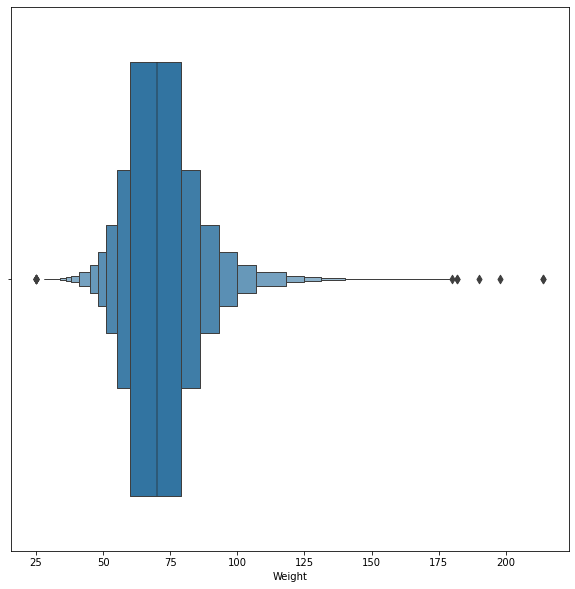

In [27]:
plt.figure(figsize=(10,10))
sns.boxenplot(data['Weight'])
plt.show()

In [28]:
data[data.Weight > 175].sort_values(by = 'Weight', ascending = False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,No Medal
23156,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,No Medal
205467,103159,Aytami Ruano Vega,M,27.0,200.0,198.0,Spain,ESP,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Heavyweight,No Medal
75031,38075,Marek Galiski,M,29.0,200.0,190.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",No Medal
237039,118869,"Christopher J. ""Chris"" Taylor",M,22.0,196.0,182.0,United States,USA,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",No Medal
237040,118869,"Christopher J. ""Chris"" Taylor",M,22.0,196.0,182.0,United States,USA,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Bronze
206352,103580,Valentyn Rusliakov,M,28.0,187.0,180.0,Ukraine,UKR,2000 Summer,2000,Summer,Sydney,Judo,Judo Men's Heavyweight,No Medal
206004,103413,Leonel Wilfredo Ruz Carmona,M,29.0,187.0,178.0,Venezuela,VEN,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Heavyweight,No Medal
94362,47755,"Marcus Jerrold ""Mark"" Henry",M,21.0,190.0,176.5,United States,USA,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Super-Heavyweight,No Medal
94363,47755,"Marcus Jerrold ""Mark"" Henry",M,25.0,190.0,176.5,United States,USA,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,No Medal


<AxesSubplot:>

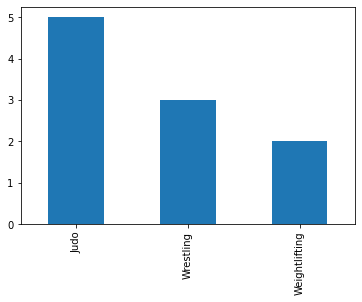

In [29]:
data[data.Weight > 175].sort_values(by = 'Height', ascending = False).Sport.value_counts().plot(kind = "bar")

So basically the heaviest sports such as Judo, Wrestling, Weightlifting require higher weight. 

In [30]:
data[data.Weight < 50].sort_values(by = 'Weight', ascending = False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
131035,65959,Merja Pivikki Lahtinen (-Kuusisto),F,25.0,167.0,49.5,Finland,FIN,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Women's 15 kilometres,No Medal
131036,65959,Merja Pivikki Lahtinen (-Kuusisto),F,25.0,167.0,49.5,Finland,FIN,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Women's 30 kilometres,No Medal
131037,65959,Merja Pivikki Lahtinen (-Kuusisto),F,25.0,167.0,49.5,Finland,FIN,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Women's 4 x 5 kilometres ...,No Medal
91858,46553,Airi Hatakeyama,F,17.0,170.0,49.0,Japan,JPN,2012 Summer,2012,Summer,London,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,No Medal
227775,114430,Ute Starke (-Kahlenberg),F,25.0,171.0,49.0,Germany,GER,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Women's Balance Beam,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40854,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Balance Beam,No Medal
40853,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,No Medal
40852,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,No Medal
40851,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,No Medal


<AxesSubplot:>

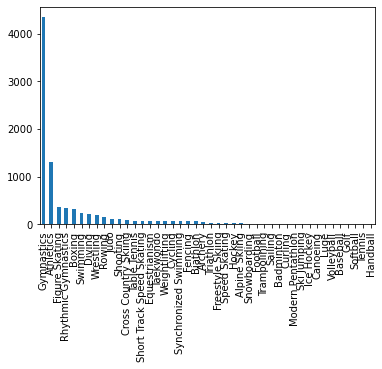

In [31]:
data[data.Weight < 50].sort_values(by = 'Height', ascending = False).Sport.value_counts().plot(kind = "bar")

### Team / NOC column

In [32]:
print('Number of unique Teams: ', len(df['Team'].unique()))


Number of unique Teams:  1184


Top 25 participant teams across 120 years of Olympics

<AxesSubplot:>

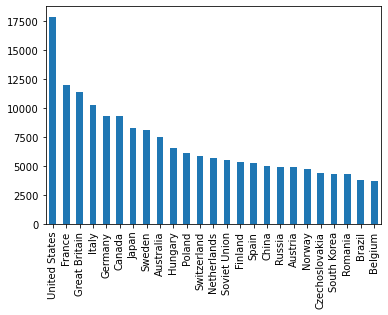

In [33]:
df.Team.value_counts().head(25).plot(kind = 'bar')

### Year column

Athlets sorted by gender in order to show participation

<AxesSubplot:xlabel='Year', ylabel='Sport'>

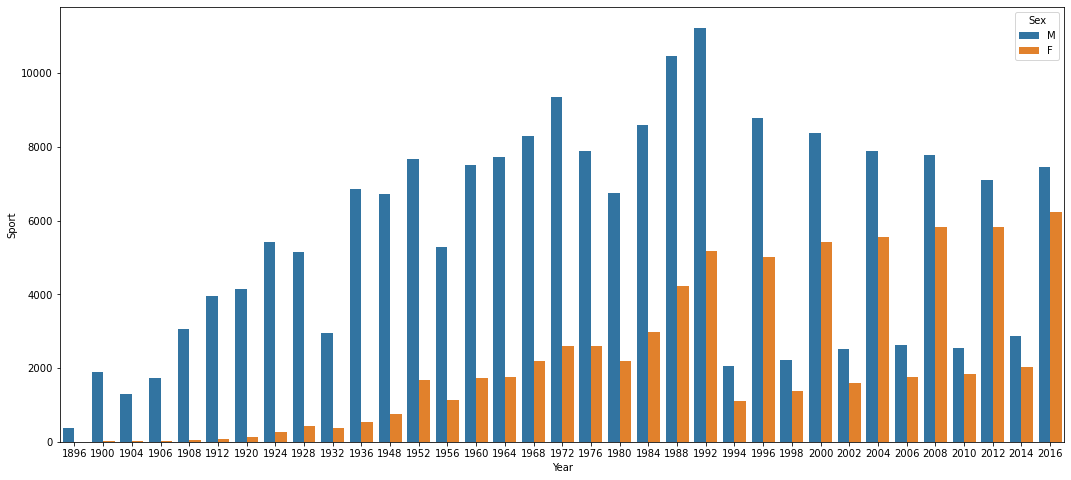

In [34]:
plt.figure(figsize=(18,8))
sns.barplot(x='Year',y='Sport',hue='Sex',data=df.groupby(['Year','Sex'],as_index=False).count())

### Season column

D:\Daniel\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


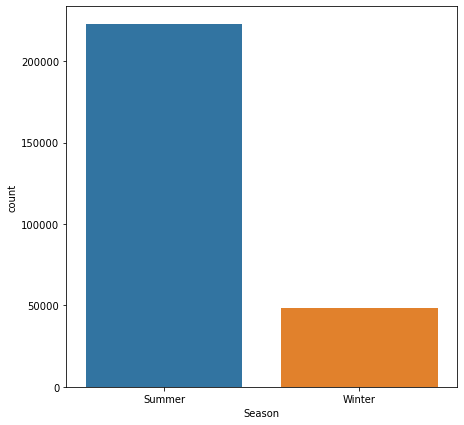

In [35]:
plt.figure(figsize=(7, 7))
g = sns.countplot(data['Season'])

### Cities column

Top 30 cities that hosted Olympic

<AxesSubplot:>

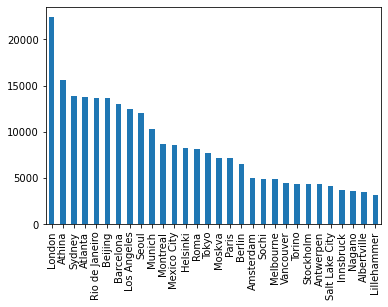

In [36]:
df.City.value_counts().head(30).plot(kind = 'bar')

### Sport column

<AxesSubplot:>

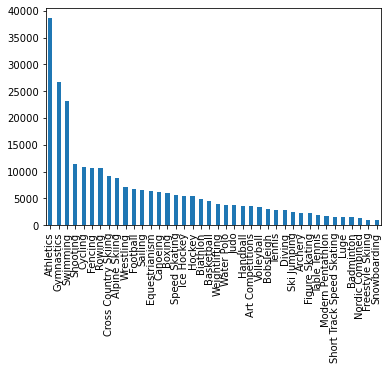

In [37]:
df.Sport.value_counts().head(40).plot(kind = 'bar')

### Medal column

D:\Daniel\Anaconda\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


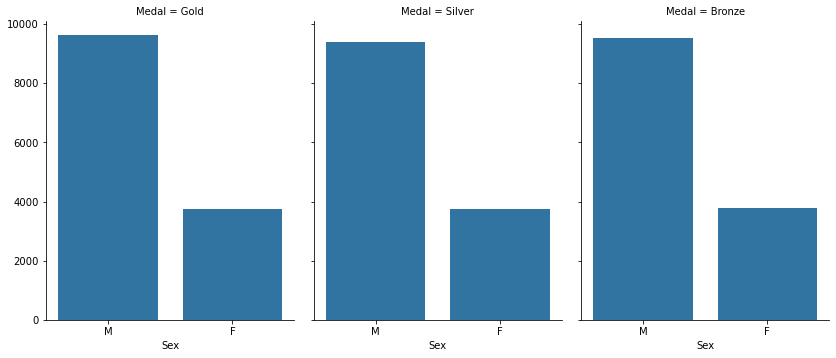

In [38]:
g = sns.FacetGrid(df[df['Medal'] != 'No Medal'], col='Medal', col_order=['Gold', 'Silver', 'Bronze'])
g.map(sns.countplot, 'Sex')
g.fig.set_size_inches(12, 6)
plt.show()

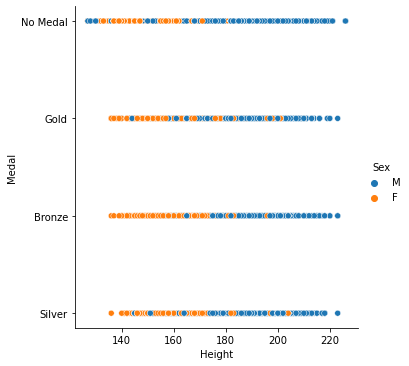

In [39]:
sns.relplot(x='Height',y='Medal',hue='Sex',data=data)

<AxesSubplot:xlabel='Medal', ylabel='Age'>

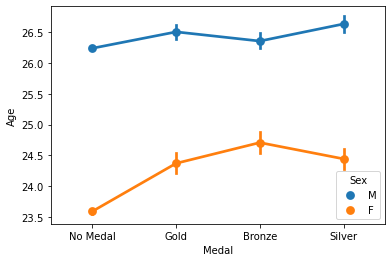

In [40]:
sns.pointplot(x='Medal',y='Age',hue='Sex',data=data)

<AxesSubplot:xlabel='Medal', ylabel='Height'>

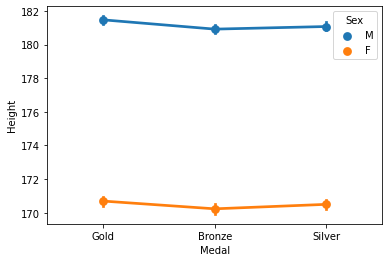

In [41]:
sns.pointplot(x='Medal',y='Height',hue='Sex',data=df)

## Part 3 - Data Processing 

### Feature Engineering

#### Cleaning and Encoding

In [42]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal


In [43]:
data['Medal'] = data['Medal'].apply(lambda x: 0 if str(x) != 'No Medal' else 1)

In [44]:
data = data.drop(['ID', 'Name', 'Games'], axis=1)

In [45]:
for column in ['Age', 'Height', 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])[column].apply(lambda x: x.fillna(x.mean()).astype(np.int))

In [46]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [47]:
data = binary_encode(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)

data = onehot_encode(
    data,
    columns=['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes=['T', 'N', 'C', 'S', 'E']
)

In [48]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


In [49]:
data

,Sex,Age,Height,Weight,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,1992,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,2012,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,178,75,1920,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,181,79,1900,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1988,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29,179,89,1976,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27,176,59,2014,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27,176,59,2014,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30,185,96,1998,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
data.shape

(271116, 2294)

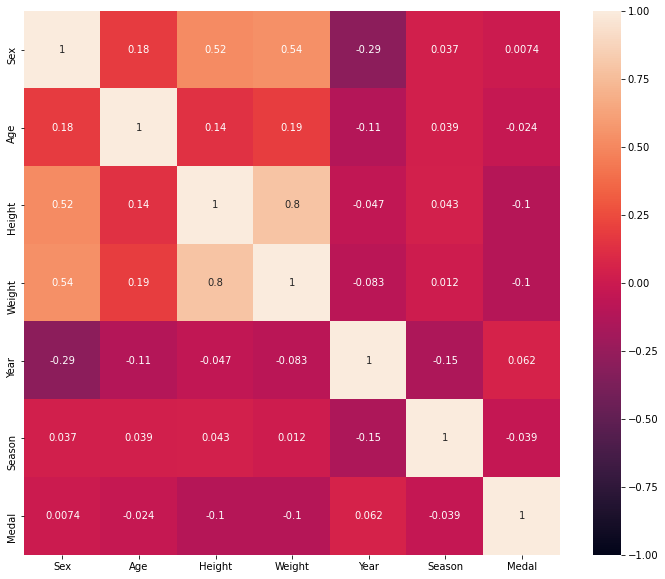

In [51]:
corr = data.loc[:, :'Medal'].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0)
plt.show()

## Part 4 - Data Modelling 

In [52]:
y = data['Medal'].copy()
X = data.drop('Medal', axis=1).copy()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50 )


In [54]:
print(X_train.shape)
print(X_test.shape)

(203337, 2293)
(67779, 2293)


---

## 4.1 Logistic Regression - Daniel Dutu

In [55]:
from sklearn.linear_model  import LogisticRegression
lor = LogisticRegression(C = 50)

In [56]:
lor.fit(X_train, y_train)

D:\Daniel\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=50)

#### Evaluating the accuracy of the model

In [57]:
lor.score(X_train, y_train)

0.867245016893138

In [58]:
lor.score(X_test, y_test)

0.8678351701854556

#### From this score I can understand that the model is not underfitting, although accuracy is not the best method to measure the predictive performance of the model.

---

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
confusion = confusion_matrix(y_test, lor.predict(X_test))
confusion

array([[ 1761,  8097],
       [  861, 57060]], dtype=int64)

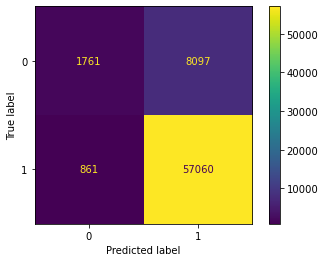

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lor, X_test, y_test)

#### Conclusion matrix tells me that my model has *58061 predictions right* and *9718 predictions wrong*

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lor.predict(X_test), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.67      0.18      0.28      9858
           1       0.88      0.99      0.93     57921

    accuracy                           0.87     67779
   macro avg       0.77      0.58      0.60     67779
weighted avg       0.85      0.87      0.83     67779



#### Classification Report gives me the information that our model is doing well.

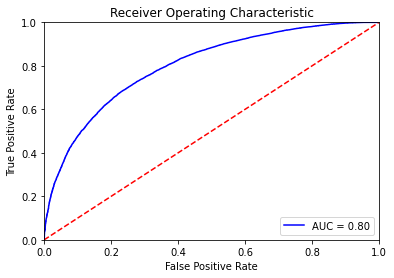

In [62]:
import sklearn.metrics as metrics

probs = lor.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### My model has an AUC value of 0.8 and this means that is having an ok performance. Probably using some GridSearch to search for the best parameters can improve the model such as C, penalty (L1,L2) and degree(1,2,3) 

---